In [1]:
%matplotlib inline
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable

import torchvision
from torchvision import transforms
from torchvision import datasets

from matplotlib import pyplot as plt

import numpy as np

In [111]:
batch_size = 12

In [112]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train  = torch.utils.data.DataLoader(
    dataset=datasets.MNIST(
        root='../data', 
        train=True, 
        download=True,
        transform=transform,
    ),
    batch_size=batch_size, 
    shuffle=True
)

In [141]:
class Encoder(nn.Module):
    def __init__(self,):
        super(Encoder, self).__init__()
        self.activation = nn.LeakyReLU(True)
        self.conv1 = nn.Conv2d(1, 16, 3, stride=3, padding=1) 
        self.pool1 = nn.MaxPool2d(2, stride=2)  
        self.conv2 = nn.Conv2d(16, 8, 3, stride=2, padding=1)
        self.pool2 = nn.MaxPool2d(2, stride=1)

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool1(x)
        x = self.activation(self.conv2(x))
        x = self.pool2(x)
        return x
    
class Decoder(nn.Module):
    def __init__(self,):
        super(Decoder, self).__init__()
        self.activation = nn.ReLU(True)
        self.finalAct = nn.Tanh()
        self.de_conv1 = nn.ConvTranspose2d(8, 16, 3, stride=2)  
        self.de_conv2 = nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1)  
        self.de_conv3 = nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1)

    def forward(self, x):
        x = self.activation(self.de_conv1(x))
        x = self.activation(self.de_conv2(x))
        x = self.activation(self.de_conv3(x))
        x = self.finalAct(x)
        return x
    
class Auto_encoder(nn.Module):
    def __init__(self,):
        super(Auto_encoder, self).__init__()
        self.encoder = Encoder().cuda()
        self.decoder = Decoder().cuda()

    def forward(self, x):
        x = self.encoder(x)
#         print(torch.max(x), torch.min(x))
        x = self.decoder(x)
        return x

In [142]:
model = Auto_encoder().cuda()
learning_rate=1e-3
weight_decay=1e-5
num_epochs=3
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate,
                             weight_decay=weight_decay)

epoch [1/3], loss:1.0147
epoch [1/3], loss:0.5894
epoch [1/3], loss:0.6779
epoch [1/3], loss:0.6769
epoch [1/3], loss:0.6488
epoch [1/3], loss:0.5798
epoch [2/3], loss:0.5851
epoch [2/3], loss:0.5400
epoch [2/3], loss:0.5814
epoch [2/3], loss:0.5725
epoch [2/3], loss:0.6113
epoch [2/3], loss:0.5378
epoch [3/3], loss:0.5709


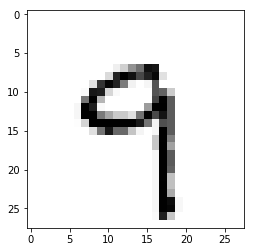

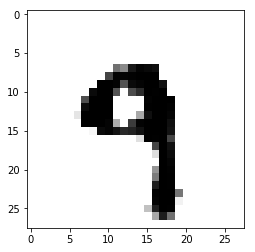

<Figure size 432x288 with 0 Axes>

epoch [3/3], loss:0.6357


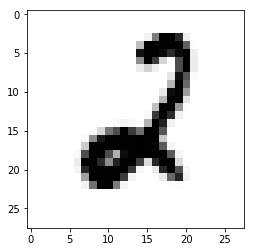

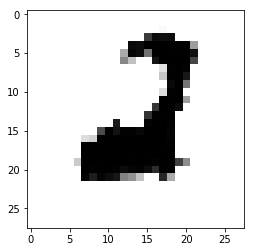

<Figure size 432x288 with 0 Axes>

epoch [3/3], loss:0.5512


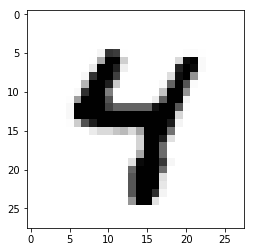

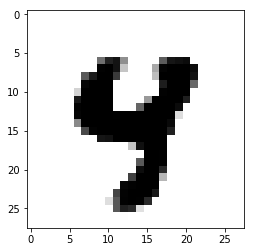

<Figure size 432x288 with 0 Axes>

epoch [3/3], loss:0.5536


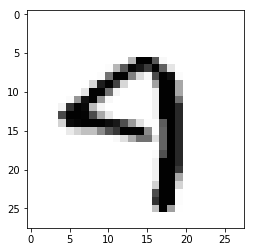

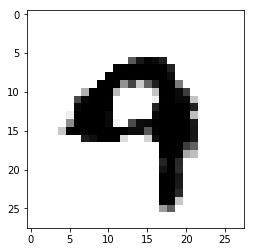

<Figure size 432x288 with 0 Axes>

epoch [3/3], loss:0.4896


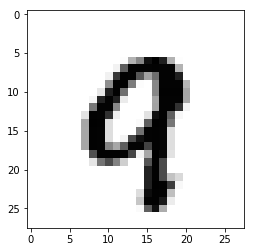

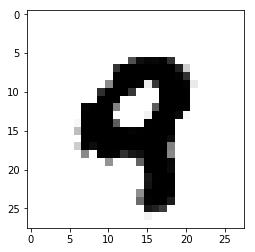

<Figure size 432x288 with 0 Axes>

epoch [3/3], loss:0.5760


In [143]:
for epoch in range(num_epochs):
    for i, data in enumerate(train):
        k = 1
        o_img, _ = data

        img = Variable(o_img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 1000 == 0 :
            print('epoch [{}/{}], loss:{:.4f}'
              .format(epoch+1, 
                      num_epochs, 
                      loss.item()))
            #plots Exemples
            if (epoch+1) == num_epochs:
                imgplot = plt.imshow(o_img[0][0],  cmap='Greys')
                plt.figure(k)
                plt.show()
                imgplot = plt.imshow(output[0].cpu().detach().numpy()[0],  cmap='Greys')
                plt.figure(k+1)
                k = k+2
                plt.show()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.item()))